#### This data is imported from kaggle.com. This is data of google play ratings and reviews
#### my targeted variable is Ratings, we will see which factor can affect the ratings of the aaplication 

 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process

C:\Users\asdw\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
apps=pd.read_csv('C:/Users/asdw/Downloads/archive/googleplaystore_user_reviews.csv')
apps.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [3]:
data=pd.read_csv('C:/Users/asdw/Downloads/archive/googleplaystore.csv')
data.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
apps=data.join(apps,lsuffix='N',rsuffix='k')
apps

,AppN,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Appk,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,10 Best Foods for You,NaN,NaN,NaN,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,BEYBLADE BURST app,I love scan qr code change special attack valt...,Positive,0.531429,0.604286
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,BEYBLADE BURST app,NaN,NaN,NaN,NaN
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,BEYBLADE BURST app,It amazing game I loved I updated stared telli...,Positive,0.100000,0.520000
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,BEYBLADE BURST app,You able control beyblades movement like joyst...,Positive,0.050000,0.512500


In [5]:
apps.tail()

,AppN,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Appk,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,BEYBLADE BURST app,I love scan qr code change special attack valt...,Positive,0.531429,0.604286
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,BEYBLADE BURST app,NaN,NaN,NaN,NaN
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,BEYBLADE BURST app,It amazing game I loved I updated stared telli...,Positive,0.100000,0.520000
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,BEYBLADE BURST app,You able control beyblades movement like joyst...,Positive,0.050000,0.512500
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device,BEYBLADE BURST app,I love game problem. With recent update Roctav...,Negative,-0.225000,0.562500


In [6]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AppN                    10841 non-null  object 
 1   Category                10841 non-null  object 
 2   Rating                  9367 non-null   float64
 3   Reviews                 10841 non-null  object 
 4   Size                    10841 non-null  object 
 5   Installs                10841 non-null  object 
 6   Type                    10840 non-null  object 
 7   Price                   10841 non-null  object 
 8   Content Rating          10840 non-null  object 
 9   Genres                  10841 non-null  object 
 10  Last Updated            10841 non-null  object 
 11  Current Ver             10833 non-null  object 
 12  Android Ver             10838 non-null  object 
 13  Appk                    10841 non-null  object 
 14  Translated_Review       6960 non-null 

In [7]:
apps.shape

(10841, 18)

In [8]:
apps.columns

Index(['AppN', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Appk', 'Translated_Review', 'Sentiment',
       'Sentiment_Polarity', 'Sentiment_Subjectivity'],
      dtype='object')

In [9]:
apps.describe()

,Rating,Sentiment_Polarity,Sentiment_Subjectivity
count,9367.000000,6961.000000,6961.000000
mean,4.193338,0.177217,0.489512
std,0.537431,0.358821,0.263210
min,1.000000,-1.000000,0.000000
25%,4.000000,0.000000,0.344444
50%,4.300000,0.145833,0.514286
75%,4.500000,0.411111,0.650000
max,19.000000,1.000000,1.000000


In [10]:
#Any missing values?
apps.isnull().sum().values.any()

True

In [11]:
#Let's check the unique values
for i in apps.columns:
    print('\n',i,'\n\n',apps[i].unique())


 AppN 

 ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']

 Category 

 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']

 Rating 

 [ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]

 Reviews 

 ['159' '967' '87510' ... '603' '1

In [12]:
#app with maximum rating count
print('\napp with maximum rating=',apps['Rating'].max())
max_rating=apps[apps['Rating'] == apps['Rating'].max()]
max_rating


app with maximum rating= 19.0


,AppN,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Appk,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,BBW Dating & Plus Size Chat,"Despite location Wi-Fi on, keeps showing match...",Neutral,0.0,0.0


observation:
*BBW dating & plus size chat app have the highest rating with 19.0 
*score 3.0M reviews 
*it is a free app with the size of 1,ooo+


In [13]:
#Dividing numeric and categorical columns

numerical = apps.select_dtypes(['float64','int64']).columns.values.tolist()
categorical = apps.select_dtypes(['object']).columns.values.tolist()
numerical


['Rating', 'Sentiment_Polarity', 'Sentiment_Subjectivity']

In [14]:
categorical

['AppN',
 'Category',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver',
 'Appk',
 'Translated_Review',
 'Sentiment']

In [15]:
#changing values from object to float
apps['Reviews']=pd.to_numeric(apps['Reviews'],errors='coerce').fillna(0).astype(float)
apps['Installs']=pd.to_numeric(apps['Installs'],errors='coerce').fillna(0).astype(float)


In [16]:
apps.head()

,AppN,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Appk,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,0.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,0.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,0.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,10 Best Foods for You,NaN,NaN,NaN,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,0.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,0.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [17]:
apps.describe()

,Rating,Reviews,Installs,Sentiment_Polarity,Sentiment_Subjectivity
count,9367.000000,1.084100e+04,10841.0,6961.000000,6961.000000
mean,4.193338,4.441119e+05,0.0,0.177217,0.489512
std,0.537431,2.927629e+06,0.0,0.358821,0.263210
min,1.000000,0.000000e+00,0.0,-1.000000,0.000000
25%,4.000000,3.800000e+01,0.0,0.000000,0.344444
50%,4.300000,2.094000e+03,0.0,0.145833,0.514286
75%,4.500000,5.476800e+04,0.0,0.411111,0.650000
max,19.000000,7.815831e+07,0.0,1.000000,1.000000


In [18]:
apps.corr()

,Rating,Reviews,Installs,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.064841,NaN,0.014111,0.011452
Reviews,0.064841,1.000000,NaN,0.009026,-0.000854
Installs,NaN,NaN,NaN,NaN,NaN
Sentiment_Polarity,0.014111,0.009026,NaN,1.000000,0.249630
Sentiment_Subjectivity,0.011452,-0.000854,NaN,0.249630,1.000000


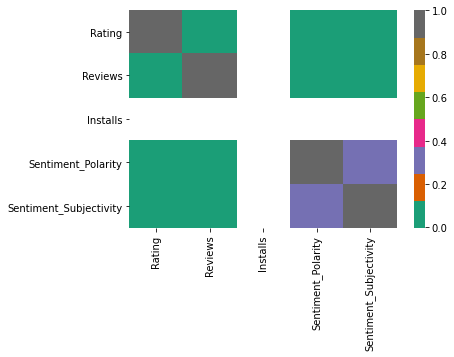

In [19]:
corrMatrix=apps.corr()
sns.heatmap(corrMatrix,annot=False,cmap='Dark2')
plt.show()

In [20]:
#APPs count by title
app_name = apps.Category.value_counts().to_frame().reset_index()
app_name.rename(columns={'Category':'Count','index':'title'},inplace=True)
app_name.sort_values(by='Count',ascending=False)

,title,Count
0,FAMILY,1972
1,GAME,1144
2,TOOLS,843
3,MEDICAL,463
4,BUSINESS,460
5,PRODUCTIVITY,424
6,PERSONALIZATION,392
7,COMMUNICATION,387
8,SPORTS,384
9,LIFESTYLE,382


In [21]:
# 10 most popular categories
app_name_10=app_name.iloc[:10]
app_name_10

,title,Count
0,FAMILY,1972
1,GAME,1144
2,TOOLS,843
3,MEDICAL,463
4,BUSINESS,460
5,PRODUCTIVITY,424
6,PERSONALIZATION,392
7,COMMUNICATION,387
8,SPORTS,384
9,LIFESTYLE,382


C:\Users\asdw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


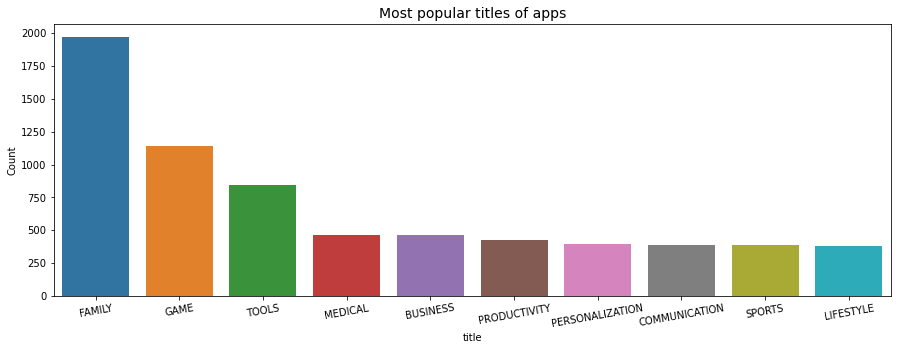

In [23]:
plt.figure(figsize =[15,5])
sns.barplot(app_name_10.title,app_name_10.Count)
plt.title('Most popular titles of apps',fontsize=14)
plt.xticks(rotation=10);

#### observation:
##### 'family','game', 'tools' ,'medical','business','productivity','peronalization','communication','sports','lifestyle' 
##### are the most popular category (based on the category user search)

C:\Users\asdw\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

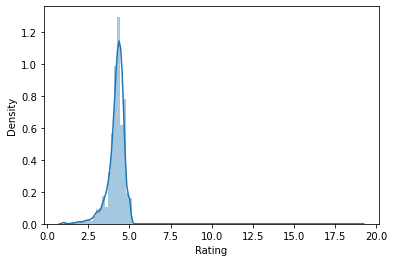

In [24]:
# Distribution of ratings
sns.distplot(apps.Rating, bins=100)

#### OBSERVATION:
 average  ratings are range from 0 to 3

Text(0.5, 1.0, 'different category')

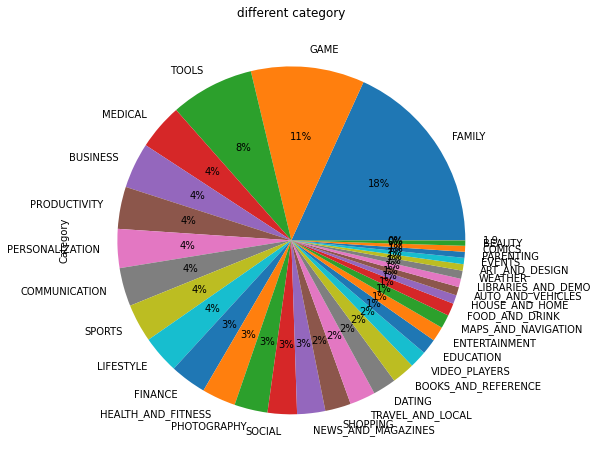

In [25]:
plt.figure(figsize=(8,8))
apps.Category.value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('different category')

C:\Users\asdw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

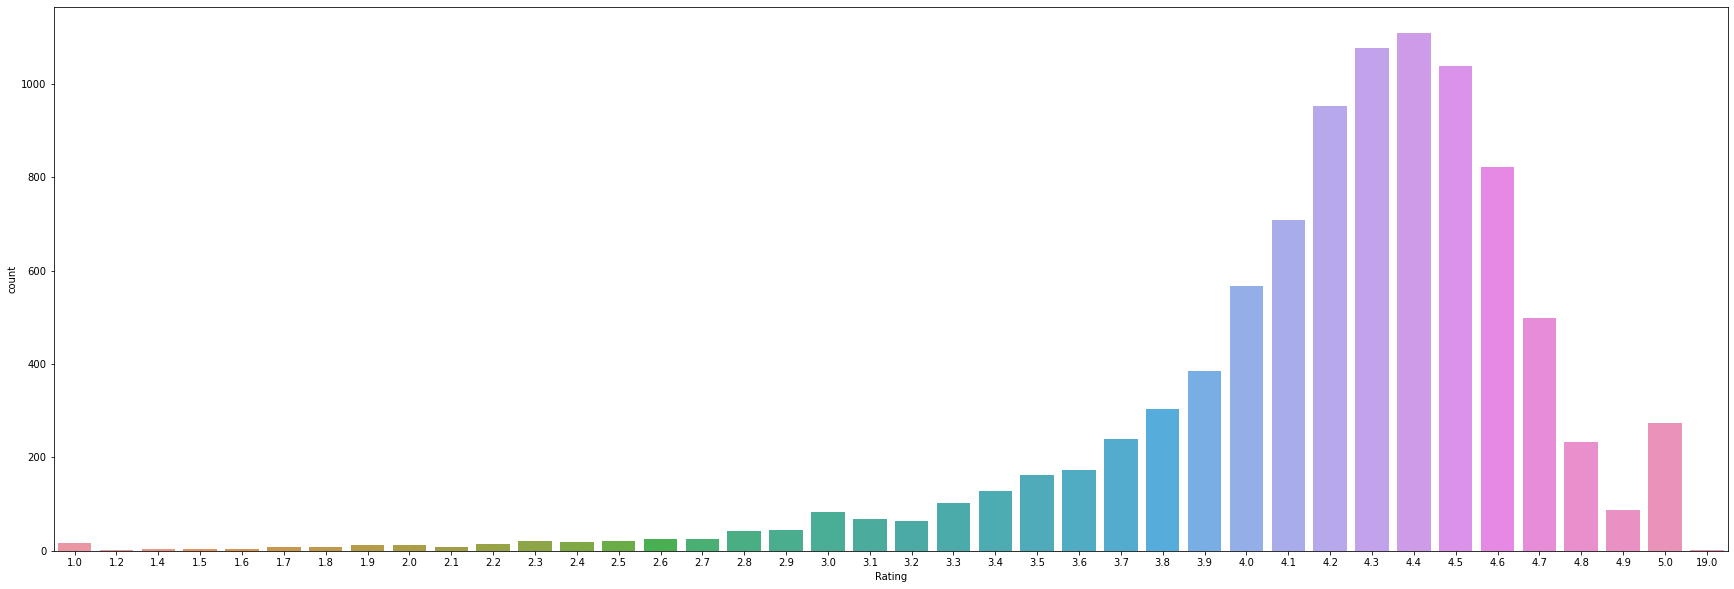

In [26]:
plt.figure(figsize=(30,10))
sns.countplot(apps['Rating'])


### observation:
#### more than 1000 applications have rating 4.4

In [7]:
# Combine similar ratings into categiroes
apps['Rating'] = apps['Rating'].replace(['4.1',  '3.9',  '4.7' , '4.5'  ,'4.3', '4.4', '3.8' ,' 4.2',  '4.6',  '3.2',  '4.0'], 'low rating')
apps['Rating'] = apps['Rating'].replace([' 4.8','4.9','3.6',  '3.7', '3.3',  '3.4', '3.5', '3.1','5.0', '2.6',  '3.0'  , '1.9', '2.5', '2.8', '2.7'], 'medium rating')
apps['Rating'] = apps['Rating'].replace(['2.9', '2.3', '2.2', ' 1.7' , '2.0' ,  '1.8',  '2.4',  '1.6',  '2.1',  '1.4',  '1.5',  '1.2', '19.0'], 'high rating')

In [8]:
apps['Installs'] = apps['Installs'].replace(['10,000+', '500,000+', '5,000,000+', '50,000,000+' ,'100,000+' ,'50,000+','500,000,000+'],'High installs')
apps['Installs'] = apps['Installs'].replace(['1,000,000+' ,'10,000,000+', '5,000+' ,'100,000,000+', '1,000,000,000+'],'medium installs')
apps['Installs'] = apps['Installs'].replace(['1,000+',  '50+' ,'100+' ,'500+', '10+', '1+', '5+', '0+', '0','Free'],'low installs')    

<AxesSubplot:xlabel='Installs', ylabel='Rating'>

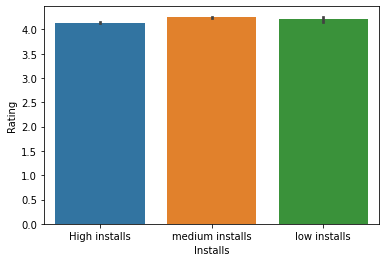

In [9]:
sns.barplot(x='Installs', y='Rating', data=apps)

#### observation:
##### medium install category has maximun rating

C:\Users\asdw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price', ylabel='count'>

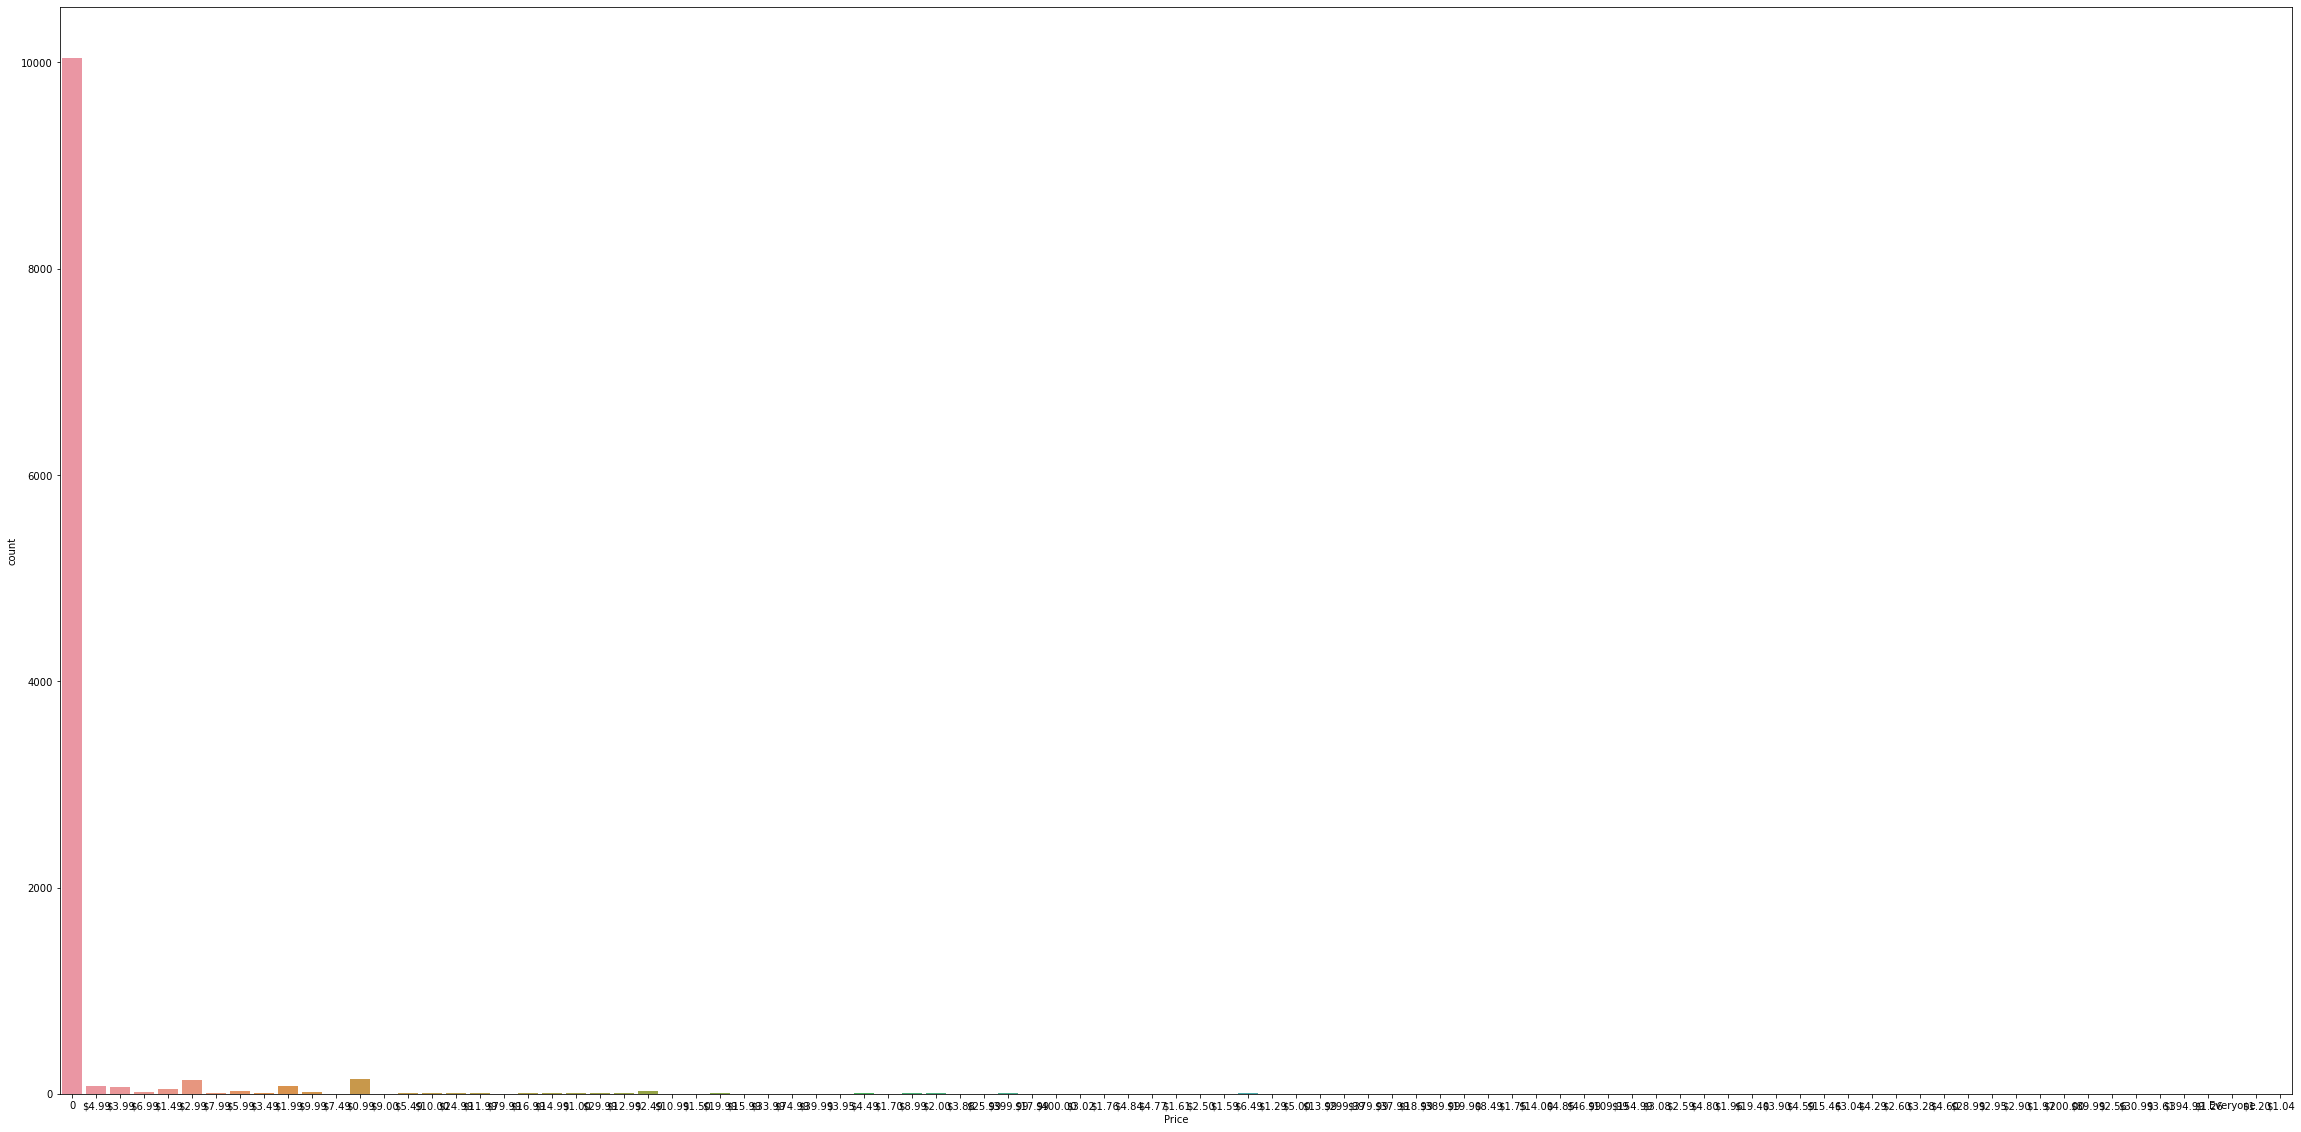

In [29]:
plt.figure(figsize=(40,20))
sns.countplot(apps['Price'])

OBSERVATION:
    people use free apps more that paid apps near about 20,000 free apps are used

<AxesSubplot:xlabel='Type', ylabel='Rating'>

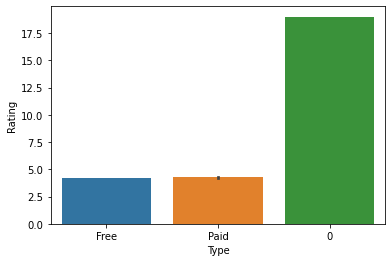

In [30]:
sns.barplot(x='Type', y='Rating', data=apps)

observation:
type 0 has maximun rating

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

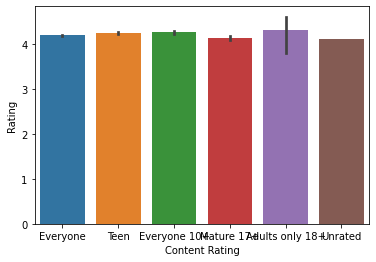

In [30]:

sns.barplot(x='Content Rating', y='Rating', data=apps)

### observation:
#### highest rating and reviews are given by 18+ youth therefore we have to target youth

<AxesSubplot:xlabel='Content Rating', ylabel='Reviews'>

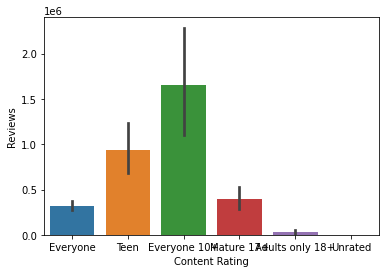

In [31]:
sns.barplot(x='Content Rating', y='Reviews', data=apps)

##### observation: everyone 10+ is giving reviews

In [32]:
# app counts by generes
app_generes = apps['Genres'].value_counts().to_frame().reset_index()
app_generes.rename(columns={'Genres':'Count','index':'Genres'},inplace=True)
app_generes.sort_values(by='Count',ascending=False)

,Genres,Count
0,Tools,842
1,Entertainment,623
2,Education,549
3,Medical,463
4,Business,460
...,...,...
99,Racing;Pretend Play,1
98,Arcade;Pretend Play,1
97,Role Playing;Education,1
96,Communication;Creativity,1


In [33]:
# 10 most popular generes
app_generes_10=app_generes.iloc[:10]
app_generes_10

,Genres,Count
0,Tools,842
1,Entertainment,623
2,Education,549
3,Medical,463
4,Business,460
5,Productivity,424
6,Sports,398
7,Personalization,392
8,Communication,387
9,Lifestyle,381


Text(0.5, 1.0, 'different Genres')

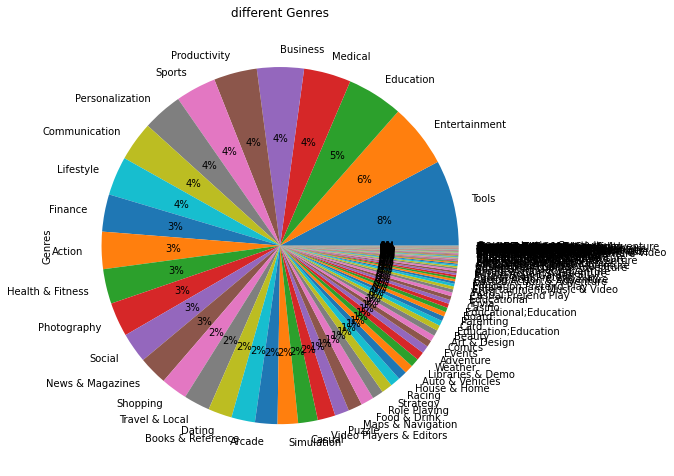

In [11]:
plt.figure(figsize=(8,10))
apps.Genres.value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('different Genres')

#### observation:
these are the 10 most popular generes with the highest no of 842 with 8%  of tools and 
entertainment with 6% follwed by education with 5%

In [35]:
#apps average rating
print('highest average rating = ',apps['Rating'].max())
print('lowest average rating =',apps['Rating'].min())

highest average rating =  19.0
lowest average rating = 1.0


In [36]:
apps.dropna()

,AppN,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Appk,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,0.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,0.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,0.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,0.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6M,0.0,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44.0,619k,0.0,Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,BEYBLADE BURST app,I would give higher I'm completing tournament'...,Positive,0.200000,0.447222
10834,FR Calculator,FAMILY,4.0,7.0,2.6M,0.0,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,BEYBLADE BURST app,This game amazing!!! But I bugs report 1. Drai...,Positive,0.115873,0.318117
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,0.0,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,BEYBLADE BURST app,I love scan qr code change special attack valt...,Positive,0.531429,0.604286
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,0.0,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,BEYBLADE BURST app,You able control beyblades movement like joyst...,Positive,0.050000,0.512500


In [37]:
#recomenation by app title
app_title=apps.drop(['AppN',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver'],axis=1)

In [38]:
apps_users=app_title.pivot(index=None,columns='Appk',values='Rating').fillna(0)
matrix_apps_users=csr_matrix(apps_users.values)
print(matrix_apps_users)

  (0, 0)	4.1
  (1, 0)	3.9
  (2, 0)	4.7
  (3, 0)	4.5
  (4, 0)	4.3
  (5, 0)	4.4
  (6, 0)	3.8
  (7, 0)	4.1
  (8, 0)	4.4
  (9, 0)	4.7
  (10, 0)	4.4
  (11, 0)	4.4
  (12, 0)	4.2
  (13, 0)	4.6
  (14, 0)	4.4
  (15, 0)	3.2
  (16, 0)	4.7
  (17, 0)	4.5
  (18, 0)	4.3
  (19, 0)	4.6
  (20, 0)	4.0
  (21, 0)	4.1
  (22, 0)	4.7
  (24, 0)	4.7
  (25, 0)	4.8
  :	:
  (10801, 173)	4.9
  (10802, 173)	4.0
  (10803, 173)	4.3
  (10804, 173)	4.2
  (10805, 173)	4.3
  (10809, 173)	4.7
  (10810, 173)	4.8
  (10812, 173)	4.1
  (10814, 173)	4.0
  (10815, 173)	4.2
  (10817, 173)	4.0
  (10819, 173)	3.3
  (10820, 173)	5.0
  (10826, 173)	4.0
  (10827, 174)	4.2
  (10828, 174)	3.4
  (10829, 174)	4.6
  (10830, 174)	3.8
  (10832, 174)	3.8
  (10833, 174)	4.8
  (10834, 174)	4.0
  (10836, 174)	4.5
  (10837, 174)	5.0
  (10839, 174)	4.5
  (10840, 174)	4.5


In [39]:
knn=NearestNeighbors(metric='cosine',algorithm='brute',n_neighbors=10)

In [40]:
knn.fit(matrix_apps_users)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=10)

### recomendation by category

In [41]:
def recommender(app_name, data,model, n_recommendations ):
    model.fit(data)
    idx=process.extractOne(app_name, apps['Category'])[2]
    print('app Selected:-',apps['Category'][idx], 'Index: ',idx)
    print('Searching for recommendations.....')
    distances, indices=model.kneighbors(data[idx], n_neighbors=n_recommendations)
    for i in indices:
        print(apps['AppN'][i].where(i!=idx))
        break

In [66]:
recommender('COMMUNICATION', matrix_apps_users, knn,5)

app Selected:- COMMUNICATION Index:  335
Searching for recommendations.....
355          Cricket Visual Voicemail
354           ZenUI Dialer & Contacts
357               TracFone My Account
356    Opera Browser: Fast and Secure
359                      Google Voice
Name: AppN, dtype: object


In [42]:
recommender('FAMILY', matrix_apps_users, knn,5)

app Selected:- FAMILY Index:  2014
Searching for recommendations.....
2017    Jewels Crush- Match 3 Puzzle
2016                          ROBLOX
1988          Hungry Shark Evolution
1989               Power Pop Bubbles
1986          Cut the Rope FULL FREE
Name: AppN, dtype: object


In [70]:
recommender('MEDICAL', matrix_apps_users, knn,5)

app Selected:- MEDICAL Index:  2243
Searching for recommendations.....
2204                Sago Mini Babies
2205    Dr. Panda & Toto's Treehouse
2202               Avokiddo Emotions
2201              DreamWorks Friends
2203             Nighty Night Circus
Name: AppN, dtype: object


In [71]:
recommender('BEAUTY', matrix_apps_users, knn,5)

app Selected:- BEAUTY Index:  98
Searching for recommendations.....
133                    Dresses Ideas & Fashions +3000
177          eBoox new: Reader for fb2 epub zip books
131                                    Discover Color
0      Photo Editor & Candy Camera & Grid & ScrapBook
132                        Eyeliner step by step 2018
Name: AppN, dtype: object


### Recomendation by Name

In [43]:
def recommender(app_name, data,model, n_recommendations ):
    model.fit(data)
    idx=process.extractOne(app_name, apps['AppN'])[2]
    print('app Selected:-',apps['AppN'][idx], 'Index: ',idx)
    print('Searching for recommendations.....')
    distances, indices=model.kneighbors(data[idx], n_neighbors=n_recommendations)
    for i in indices:
        print(apps['AppN'][i].where(i!=idx))
        break

In [44]:
recommender('Photo Editor & Candy Camera & Grid & ScrapBook	', matrix_apps_users, knn,5)

app Selected:- Photo Editor & Candy Camera & Grid & ScrapBook Index:  0
Searching for recommendations.....
133              Dresses Ideas & Fashions +3000
177    eBoox new: Reader for fb2 epub zip books
131                              Discover Color
0                                           NaN
132                  Eyeliner step by step 2018
Name: AppN, dtype: object


In [46]:
recommender('Candy Crush Saga', matrix_apps_users, knn,5)

app Selected:- Candy Crush Saga Index:  1655
Searching for recommendations.....
1603      Vaniday - Beauty Booking App
1604                  Fashion in Vogue
1602                       MK eCatalog
1600    OK cashbag [point of pleasure]
1605                            Mirror
Name: AppN, dtype: object


### conclusion:
####  If we have to build application we have to focus on various factors:
#### 1.category of application- according to the data anylysis 'Family' has highest number of count but on                     other hand 'maps and navigation' has the highest number of ratings
#### 2. 'Creativity' Genres has the highest number  of ratings and 'tools' has highest number of count
#### 3.most of the youth is giving the reviews and ratings so we have to focus on youth.
#### 4.highest value of rating is 19.0(BBW dating aap) and the lowest rating is 1.0
#### 5.Installs is directly depend on ratings.
#### 6.people generally install type 0 apps and FREE apps are offered by most of the crowd(20,000 counts)